In [14]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Выбор модели сегментации
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

/home/froschin/mambaforge/envs/nlp/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/froschin/mambaforge/envs/nlp/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [16]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Размер входного изображения модели
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Нормализация, характерная для ImageNet
])

In [17]:
image_path = "/home/froschin/work/ML/fashion/1636172403_30-mykaleidoscope-ru-p-zhenskaya-zimnyaya-verkhnyaya-odezhda-devu-31-1000x690.jpg"
image_path = "/home/froschin/work/ML/fashion/1M.jpeg"

# Загрузка и подготовка изображения
input_image = Image.open(image_path).convert("RGB")
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Добавляем размерность batch

In [18]:
input_batch.shape

torch.Size([1, 3, 224, 224])

In [19]:
with torch.no_grad():
    output = model(input_batch)

In [20]:
output_predictions = output['out'][0]

In [21]:
output_predictions.shape

torch.Size([21, 224, 224])

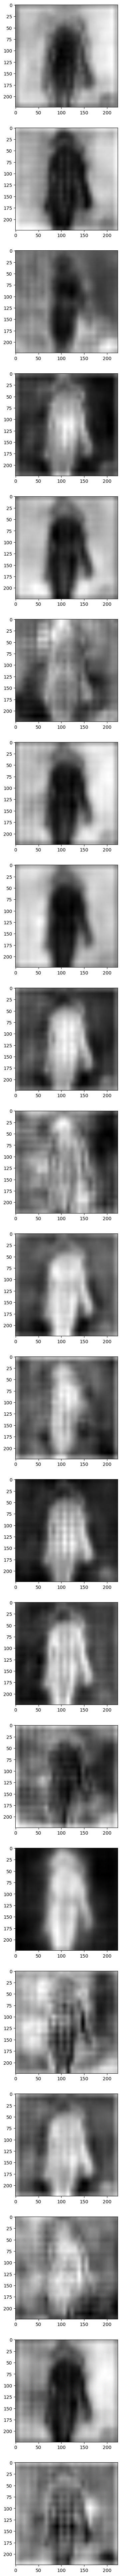

In [22]:
fig, axes = plt.subplots(21, 1, figsize=(100, 100))
axes = axes.flatten()

for i, sub_tensor in enumerate(output_predictions):
    axes[i].imshow(sub_tensor.numpy(), cmap='gray')

plt.show()

In [23]:
output_predictions_argmax = output_predictions.argmax(0)

In [30]:
output_predictions_argmax.shape

torch.Size([224, 224])

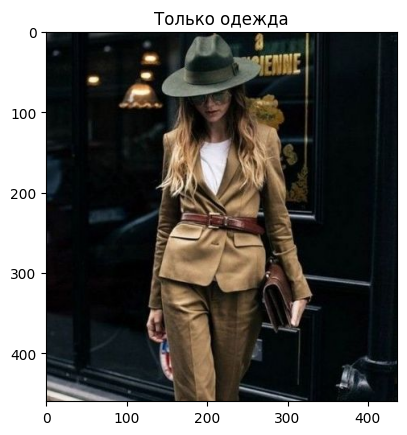

In [25]:
plt.imshow(input_image)
plt.title("Только одежда")
plt.show()

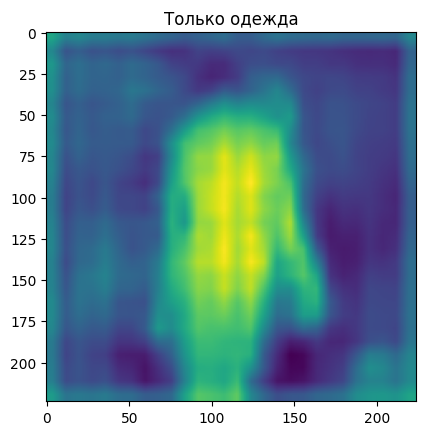

In [31]:
plt.imshow(output_predictions_argmax)
plt.title("Только одежда")
plt.show()

In [32]:
mask_expanded = output_predictions_argmax.unsqueeze(0).repeat(3, 1, 1)

segmented_image = input_tensor * mask_expanded.numpy()

segmented_image_transposed = segmented_image.permute(1, 2, 0).numpy()

/tmp/ipykernel_3419960/2664410128.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  segmented_image = input_tensor * mask_expanded.numpy()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6.343725..7.480606].


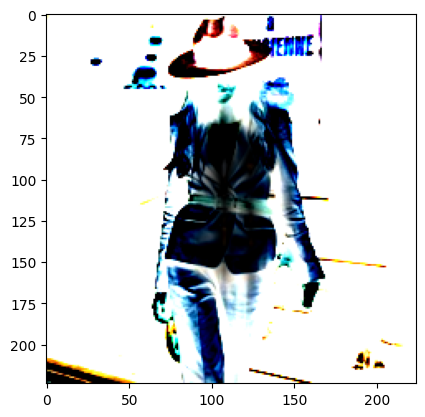

In [33]:
plt.figure()
plt.imshow(segmented_image_transposed)  # Преобразуем в numpy и рисуем
plt.show()